In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### SVM Linear Classification of a dataset

In [4]:
data = pd.read_csv('data/LinearlySeperableData.csv', header =None).values

Xtrain, Xtest, ytrain, ytest = train_test_split(data[:, 0:2], data[:, 2], test_size=0.2, random_state=1)

In [5]:
def plot_decision_boundary(model, title, x_train, x_test, y_train):
    h = 0.01
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

    x_min, x_max = x_train[:,0].min(), x_train[:,0].max() 
    y_min, y_max = x_train[:,1].min(), x_train[:,1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Also plot the training points
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

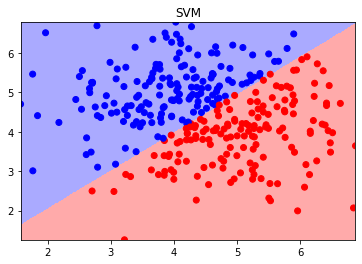

In [6]:
sv = SVC(kernel='linear').fit(Xtrain, ytrain)
plot_decision_boundary(sv, 'SVM', Xtrain, Xtest, ytrain)